<a href="https://colab.research.google.com/github/Ankita448/AICTEIinternship/blob/main/Forest_Fire_Detection_using_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)




Path to dataset files: /kaggle/input/the-wildfire-dataset


# New Section

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Flatten,Dropout,Input


In [3]:
physical_devices=tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices)>0:

  tf.config.experimental.set_memory_growth(physical_devices[0],True)
  print( 'GPU is Used!')
else:
    print('GPU is Unavaliable!')



GPU is Unavaliable!


In [4]:
train_dir="/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train"
val_dir="/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val"
test_dir="/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test"


In [5]:

classes=os.listdir(train_dir)
num_classes=len(classes)

print(f'Number of classes: {num_classes}')
print(f'Classes: {classes}')

Number of classes: 2
Classes: ['nofire', 'fire']


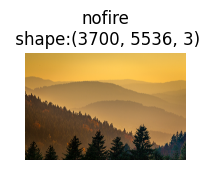

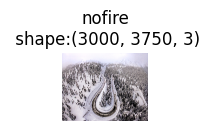

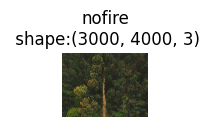

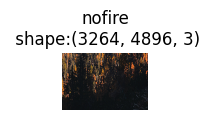

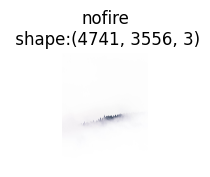

In [6]:
#let's visualize the images in the dataset
plt.figure(figsize=(12,10))
for i in range(5):
  class_path=os.path.join(train_dir,classes[0])
  img_name=os.listdir(class_path)[i]

  img_path=os.path.join(class_path,img_name)
  img=plt.imread(img_path)
  plt.subplot(1,5,i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]}\n shape:{img.shape}')
  plt.axis('off')
  plt.show()

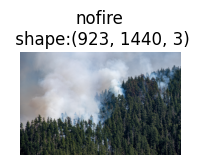

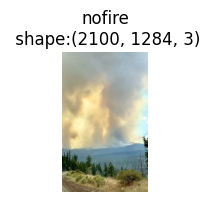

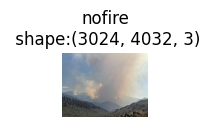

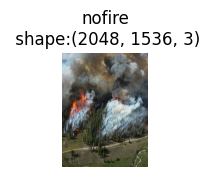

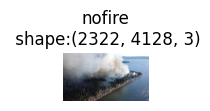

In [7]:
plt.figure(figsize=(12,10))
for i in range(5):
  class_path=os.path.join(train_dir,classes[1])
  img_name=os.listdir(class_path)[i]

  img_path=os.path.join(class_path,img_name)
  img=plt.imread(img_path)
  plt.subplot(1,5,i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]}\n shape:{img.shape}')
  plt.axis('off')
  plt.show()

In [8]:
#preprocessing
#image dimensions and batch size
img_width,img_height=150,150
batch_size=32
train_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)
test_data=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)
val_generator=val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)
test_generator=test_data.flow_from_directory(
    test_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [ ]:
class_mapping=train_generator.class_indices
# print(class_mapping)
#Extract the class names
class_names=list(class_mapping.keys())
print("Class_Names: ",class_names)

Class_Names:  ['fire', 'nofire']


In [10]:
model=Sequential([
    Input((img_width,img_height,3)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
]
)

In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples,
    epochs=12,
    validation_data=val_generator,
    validation_steps=val_generator.samples
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
  21/1887 ━━━━━━━━━━━━━━━━━━━━ 4:54:14 9s/step - accuracy: 0.5511 - loss: 0.7052 

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


  36/1887 ━━━━━━━━━━━━━━━━━━━━ 4:59:23 10s/step - accuracy: 0.5756 - loss: 0.6811

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


  59/1887 ━━━━━━━━━━━━━━━━━━━━ 4:54:03 10s/step - accuracy: 0.5987 - loss: 0.6567

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1887/1887 ━━━━━━━━━━━━━━━━━━━━ 704s 366ms/step - accuracy: 0.6445 - loss: 0.6103 - val_accuracy: 0.6642 - val_loss: 0.5659
Epoch 2/12
1887/1887 ━━━━━━━━━━━━━━━━━━━━ 720s 354ms/step - accuracy: 0.7158 - loss: 0.5465 - val_accuracy: 0.7264 - val_loss: 0.5255
Epoch 3/12
  19/1887 ━━━━━━━━━━━━━━━━━━━━ 4:29:44 9s/step - accuracy: 0.7025 - loss: 0.5562

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [ ]:
#evaluate
test_loss,test_acc=model.evaluate(test_generator,steps=test_generator.samples)
print(f'Test Accuracy: {test_acc:4f}')



In [ ]:
model.save('FFD.Keras')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
img=image.load_img(img_path,target_size=(150,150))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255.0
predictions=model.predict(img_array)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255.0
prediction=model.predict(img_array)
if prediction[0] >0.5:
  predicted_class=class_names[1]
else:
  predicted_class=class_names[0]
  plt.imshow(img)
  plt.title(f'Predicted Class: {predicted_class}')
  plt.axis('off')



In [ ]:
os.list('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train/nofire' )

In [ ]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test')